# **Detección de fraude    -    deep learning** 

Acerca del conjunto de datos
Es importante que las compañías de tarjetas de crédito puedan reconocer las transacciones de tarjetas de crédito fraudulentas para que a los clientes no se les cobre por artículos que no compraron.

Acerca de los datos
El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172 % de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las funciones originales ni más información general sobre los datos. Las características V1, V2, … V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Cantidad' es la cantidad de la transacción, esta función se puede utilizar para el aprendizaje sensible a los costos dependiente del ejemplo. Feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.


El **contexto comercial** de este conjunto de datos es la detección de fraude en transacciones con tarjetas de crédito. Es importante para las compañías de tarjetas de crédito poder reconocer transacciones fraudulentas para evitar que los clientes sean cobrados por artículos que no compraron.

El **contexto analítico** es el uso de técnicas de aprendizaje automático para detectar patrones en las transacciones que indican fraude. Se utiliza un conjunto de datos que contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. El conjunto de datos presenta un desequilibrio de clase significativo, con solo el 0,172% de las transacciones siendo fraudulentas. El conjunto de datos solo contiene variables de entrada numéricas que son el resultado de una transformación PCA.

La **hipótesis** a comprobar es si es posible detectar patrones en las transacciones que indican fraude utilizando técnicas de aprendizaje automático, a pesar del desequilibrio de clase significativo.

# **Instalacion, librerias, dataset**

In [183]:
%pip install --upgrade pip -q
%pip install seaborn -q
%pip install pandas -q
%pip install numpy -q
%pip install matplotlib -q
%pip install sidetable -q
%pip install xgboost -q
%pip install lazypredict -q
%pip install imblearn -q
%pip install missingno -q
%pip install statsmodels -q
%pip install -U scikit-learn -q
%pip install mlxtend -q
%pip install --upgrade scikit-learn -q
%pip install requests -q
%pip install tensorflow -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you 

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import xgboost as xgb
import imblearn
import statsmodels.formula.api as sm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from pandas.api.types import is_numeric_dtype

In [185]:
cc= data = pd.read_csv('C:\\Users\\Usuario\\OneDrive\\Datos adjuntos\\Documentos\\Proyectos personales - DATA\\Datasets\\creditcard.csv')
pd.options.display.max_columns = None
cc.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Principales insigths y preparacion para visualizaciones.

In [186]:
df = pd.DataFrame(cc)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [187]:
df=df.drop(['Time'], axis=1)

In [188]:
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

def dfinfo(df):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Nulos', 'Unicos', 'Numerico'])
  for col in df:

      data_series = df[col]
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  df_describe = df.describe(include='all').T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')

df_uni_stats = dfinfo(df)
df_uni_stats

,Cantidad,Tipo,Nulos,Unicos,Numerico,mean,std,min,25%,50%,75%,max,sesgo,kurt
V1,284807,float64,0,275663,True,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549,-3.2807,32.4867
V2,284807,float64,0,275663,True,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577,-4.6249,95.7731
V3,284807,float64,0,275663,True,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826,-2.2402,26.6196
V4,284807,float64,0,275663,True,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753,0.6763,2.6355
V5,284807,float64,0,275663,True,0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017,-2.4259,206.9046
V6,284807,float64,0,275663,True,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016,1.8266,42.6425
V7,284807,float64,0,275663,True,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895,2.5539,405.6074
V8,284807,float64,0,275663,True,0.0000,1.1944,-73.2167,-0.2086,0.0224,0.3273,20.0072,-8.5219,220.5870
V9,284807,float64,0,275663,True,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950,0.5547,3.7313
V10,284807,float64,0,275663,True,0.0000,1.0888,-24.5883,-0.5354,-0.0929,0.4539,23.7451,1.1871,31.9882


**Insights:**

Este es un DataFrame de Pandas con 284807 filas y 31 columnas. Las columnas incluyen Hora, V1-V28, Cantidad y Clase. Todas las columnas contienen valores no nulos y son tipos de datos float64 o int64. La columna Clase parece ser una variable de destino y el resto de las columnas son probablemente características. Ademas la columna time no nos viene al caso.

De estas estadísticas podemos ver que las variables V1 a V28 tienen una media de alrededor de 0 con una desviación estándar de 1. Los valores mínimo y máximo son diferentes para cada columna, pero todos están dentro de rangos razonables.

La columna "Amount" tiene una media de 88,35 y una desviación estándar de 250,12. El valor mínimo es 0 y el valor máximo es 25691.16.

La columna "Class" es la variable de resultado, indica si la transacción es fraudulenta (1) o no (0). La media es 0,0017, lo que significa que solo un porcentaje muy pequeño de las transacciones son fraudulentas.


Además, como se mencionó anteriormente, la media es 0.0017, lo que significa que solo una porción muy pequeña de las transacciones son fraudulentas. Esto es importante tener en cuenta al construir un modelo de detección de fraude, ya que el desequilibrio de clases puede afectar la precisión del modelo. Es posible que sea necesario utilizar técnicas de equilibrio de clases para manejar este desequilibrio y mejorar la precisión del modelo.

# EDA **Vista grupal**

**Operaciones normales y fraudulentas en totalidad, porcentaje y montos $**

In [189]:
pd.reset_option('display.float_format')

total_c = df['Class'].value_counts()
percentage = (df['Class'].value_counts() / len(df)) * 100
amount = pd.Series(df.groupby("Class")["Amount"].sum(), name='amount')

result = pd.concat([total_c, percentage, amount], axis=1, keys=['total', 'percentage', 'amount'])

total_row = pd.Series([result['total'].sum(), 100, df['Amount'].sum()], 
                      name='Total', 
                      index=['total', 'percentage', 'amount'])

result.loc['Total'] = total_row

result = result.round({'percentage': 4, 'amount': 2})
result = result.rename(index={0: 'Operacion normal', 1: 'Operacion fraudulenta', 'Total': 'Total'})

result

,total,percentage,amount
Operacion normal,284315.0,99.8273,25102462.04
Operacion fraudulenta,492.0,0.1727,60127.97
Total,284807.0,100.0000,25162590.01


**Correlacion de las variables:**

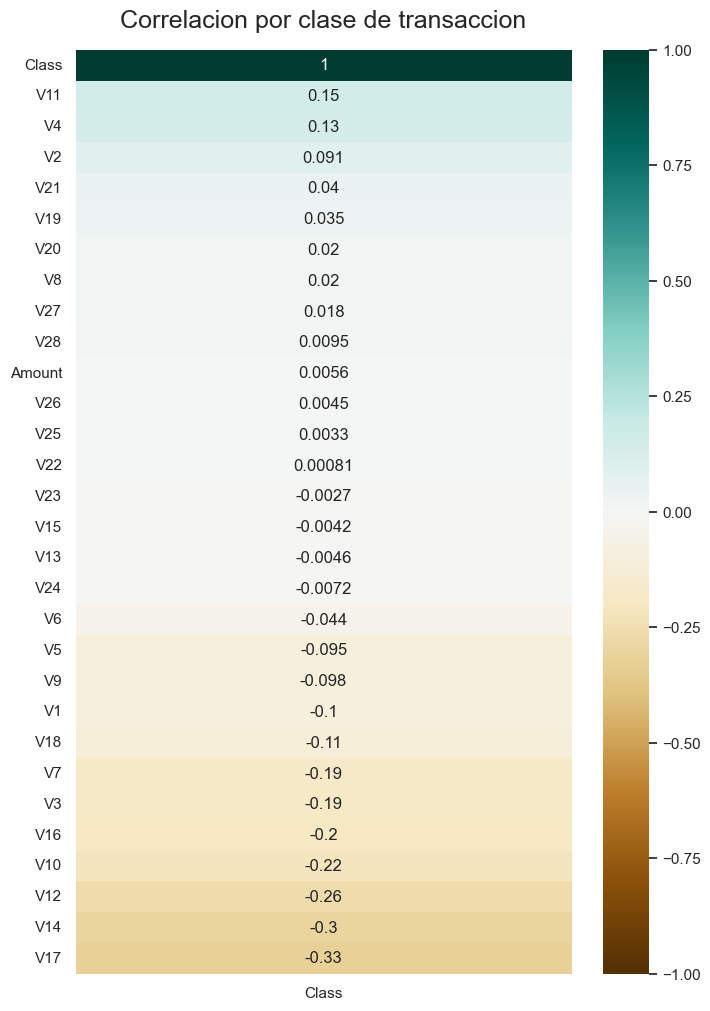

In [190]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlacion por clase de transaccion', fontdict={'fontsize':18}, pad=16);

In [191]:
#para trabajar mas organizado
df_normal = df[df['Class'] == 0]
df_fraude = df[df['Class'] == 1]

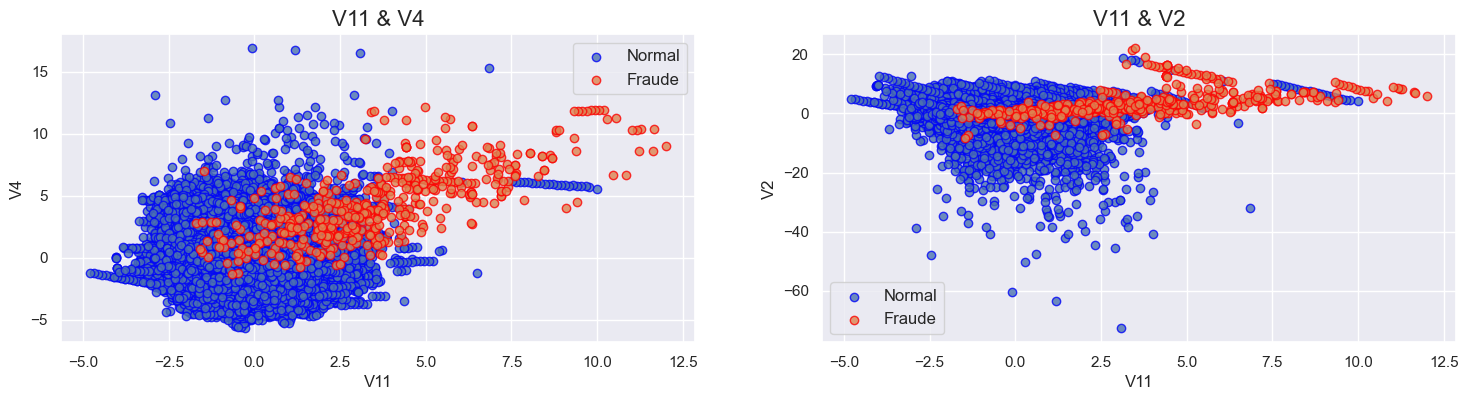

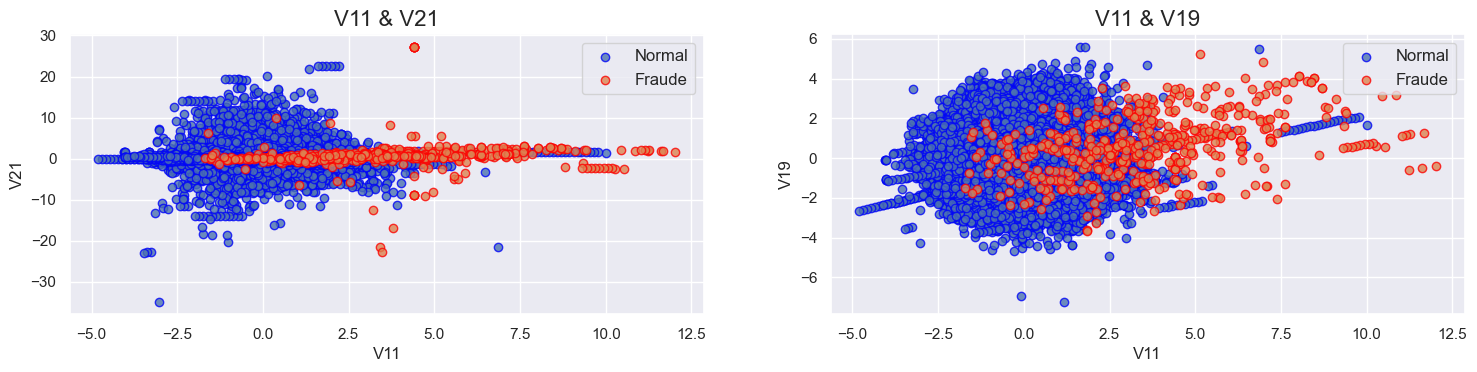

In [192]:
#V11 & V4
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.scatter(df_normal['V11'], df_normal['V4'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V4'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V4', fontsize=16)
plt.ylabel('V4', fontsize=12)
plt.xlabel('V11', fontsize=12)

#V11 & V2
plt.subplot(122)
plt.scatter(df_normal['V11'], df_normal['V2'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V2'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V2', fontsize=16)
plt.ylabel('V2', fontsize=12)
plt.xlabel('V11', fontsize=12)

#V11 & V21
plt.figure(figsize=(18,8))
plt.subplot(221)
plt.scatter(df_normal['V11'], df_normal['V21'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V21'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V21', fontsize=16)
plt.ylabel('V21', fontsize=12)
plt.xlabel('V11', fontsize=12)

#V11 & V19
plt.subplot(222)
plt.scatter(df_normal['V11'], df_normal['V19'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V19'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V19', fontsize=16)
plt.ylabel('V19', fontsize=12)
plt.xlabel('V11', fontsize=12)
plt.show()

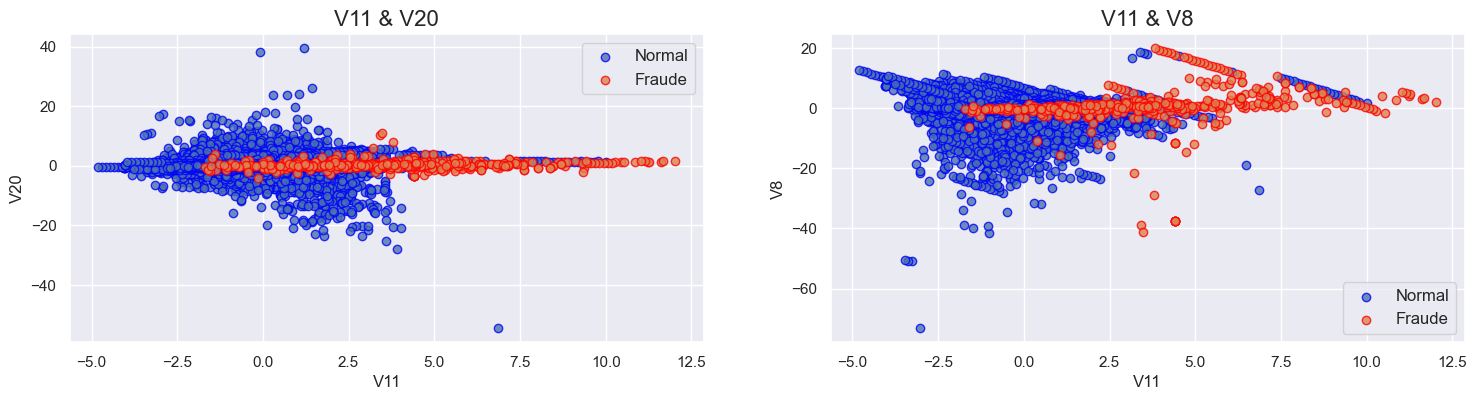

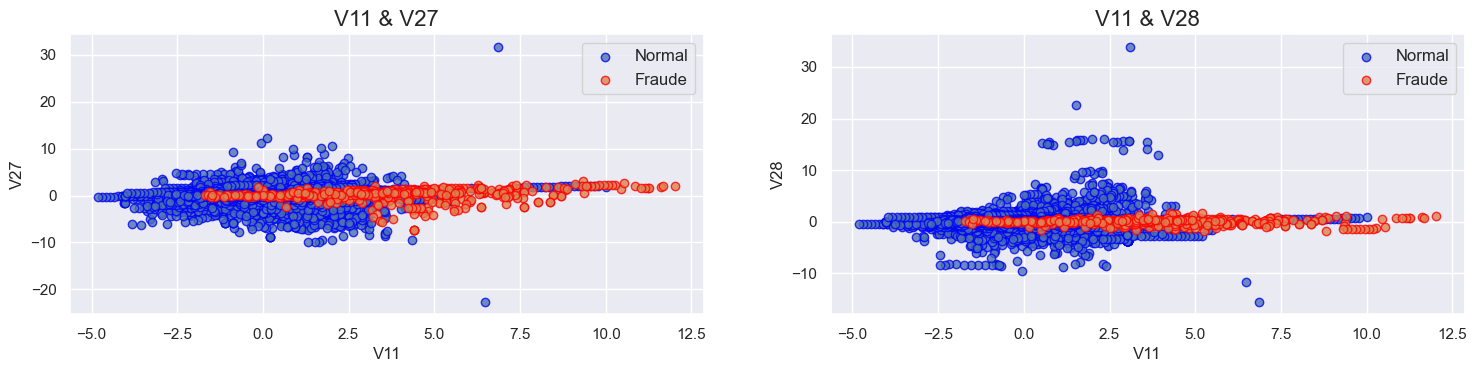

In [193]:
#V11 & V20
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.scatter(df_normal['V11'], df_normal['V20'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V20'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V20', fontsize=16)
plt.ylabel('V20', fontsize=12)
plt.xlabel('V11', fontsize=12)

#V11 & V8
plt.subplot(122)
plt.scatter(df_normal['V11'], df_normal['V8'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V8'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V8', fontsize=16)
plt.ylabel('V8', fontsize=12)
plt.xlabel('V11', fontsize=12)

#V11 & V27
plt.figure(figsize=(18,8))
plt.subplot(221)
plt.scatter(df_normal['V11'], df_normal['V27'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V27'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V27', fontsize=16)
plt.ylabel('V27', fontsize=12)
plt.xlabel('V11', fontsize=12)

#V11 & V28
plt.subplot(222)
plt.scatter(df_normal['V11'], df_normal['V28'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V28'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V28', fontsize=16)
plt.ylabel('V28', fontsize=12)
plt.xlabel('V11', fontsize=12)
plt.show()

Se puede ver que los casos de fraude estan en los outliers, esto por que en la mayor cantidad de observaciones en valores extremos se ven operaciones fraudulentas. 

Es muy curioso la linea recta en fraudes con valores 0 o cercanos a 0. En mayor proporcion que en operaciones normales.

# **Outliers, preparando el modelo**

IQR es otro método sólido para etiquetar los valores atípicos.

In [194]:
def detect_outliers(df,n,features):

  outlier_indices = []
  for col in features:
      #25%
      Q1 = np.percentile(df[col], 25)
      #75%
      Q3 = np.percentile(df[col],75)
      #IQR
      IQR = Q3 - Q1
      outlier_step = 1.5 * IQR
      outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
      outlier_indices.extend(outlier_list_col)
        
    #observaciones con más de 2 valores atípicos
  outlier_indices = Counter(outlier_indices)        
  multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
  return multiple_outliers   
      #Outliers
Outliers_IQR = detect_outliers(df,2,['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
      #Drop outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

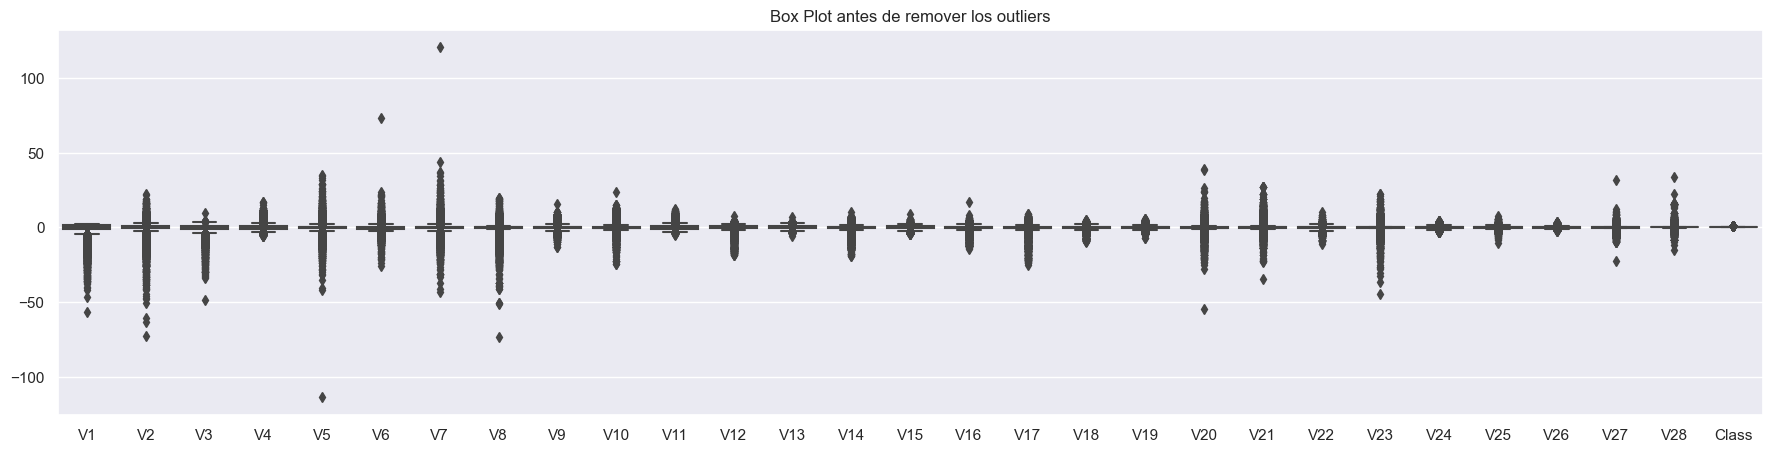

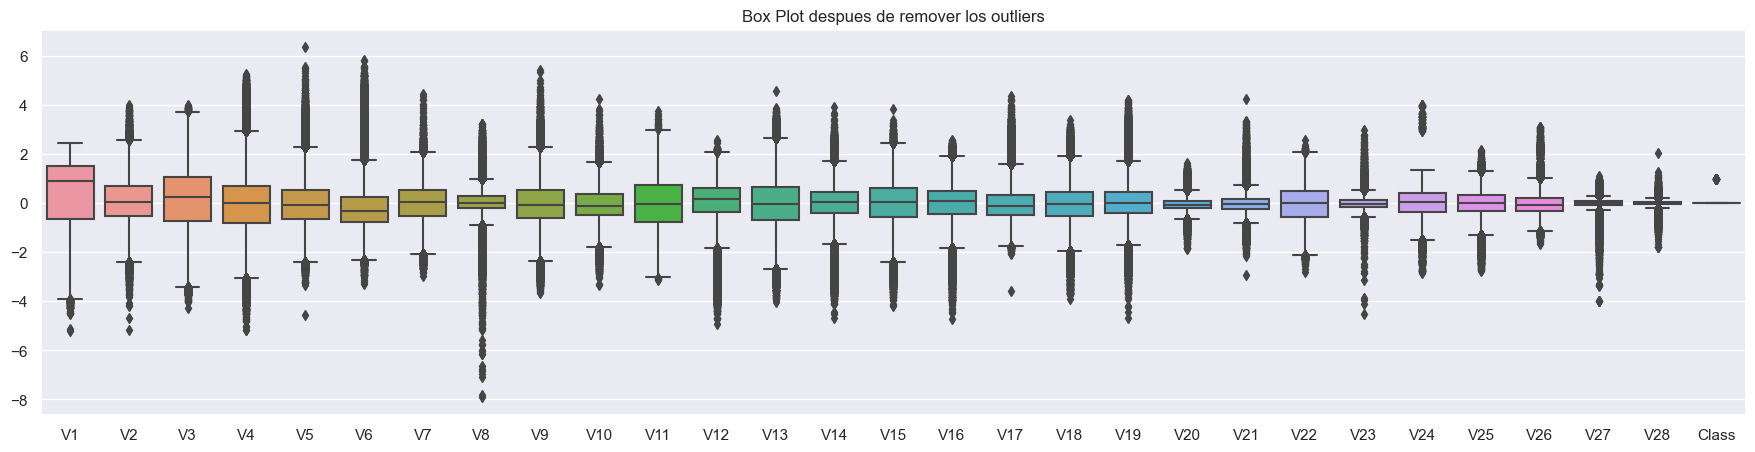

In [195]:
df_no_amount = df.drop(columns=['Amount'])
df_no_amount_out = df_out.drop(columns=['Amount'])

plt.figure(figsize=(22,5))
sns.boxplot(data=df_no_amount)
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(data=df_no_amount_out)
plt.title("Box Plot despues de remover los outliers")
plt.show()

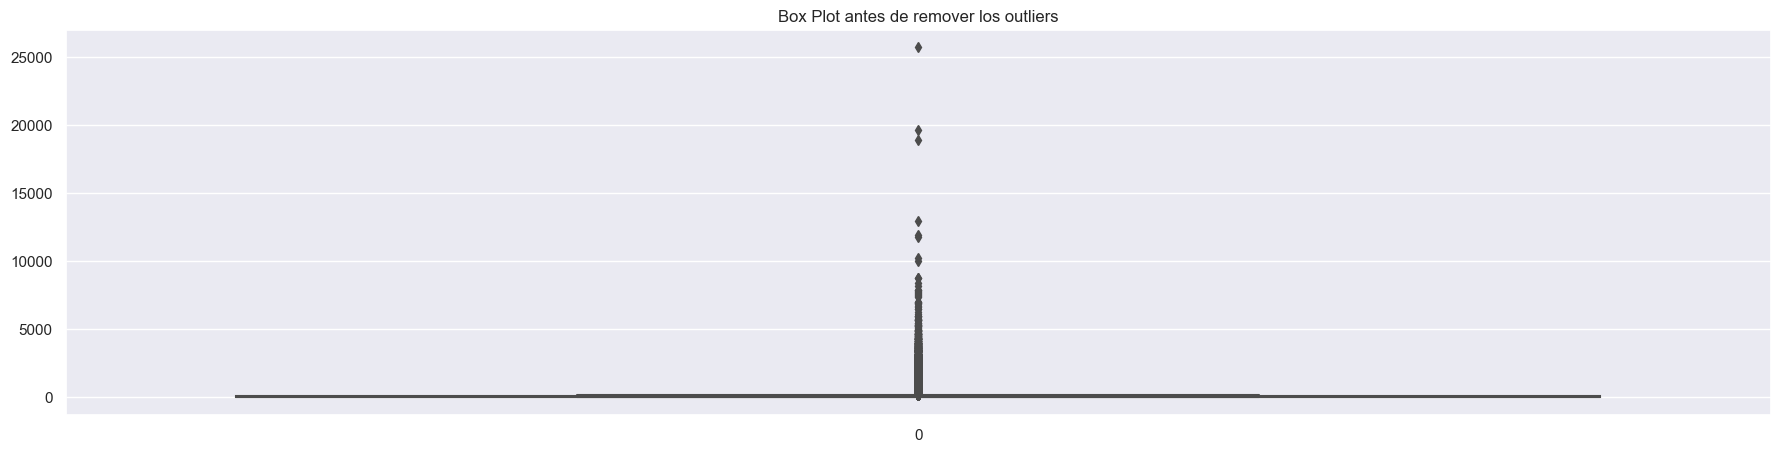

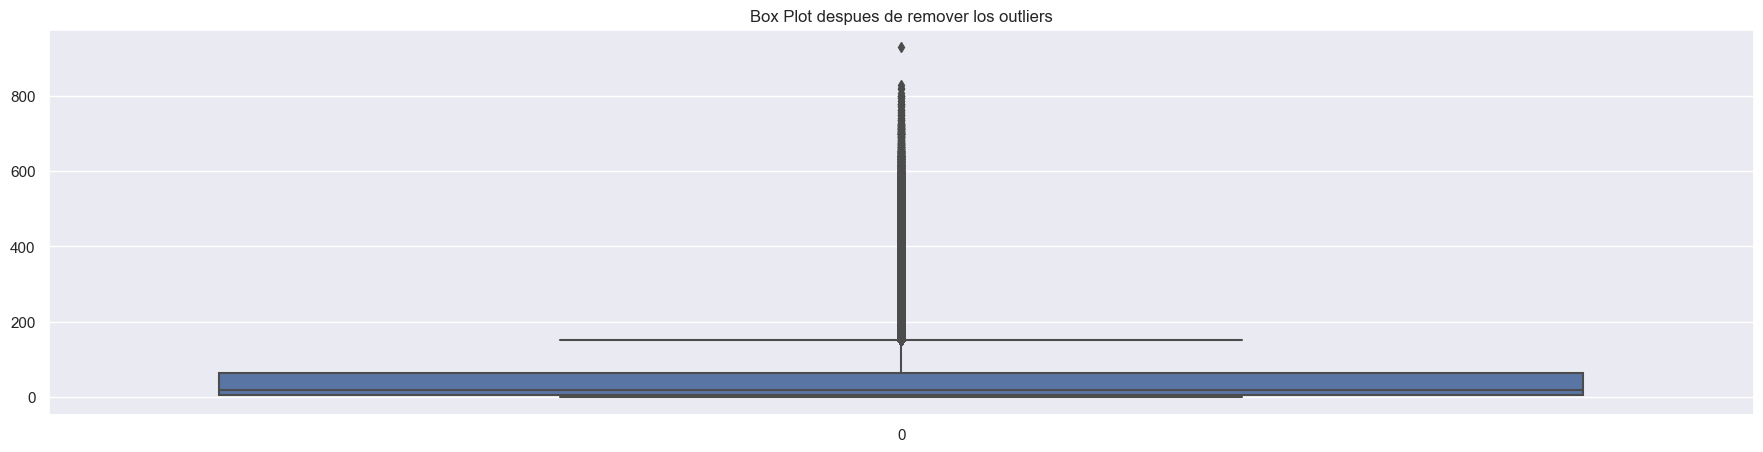

In [196]:
plt.figure(figsize=(22,5))
sns.boxplot(df['Amount'])
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(df_out['Amount'])
plt.title("Box Plot despues de remover los outliers")
plt.show()

In [197]:
total_c = df['Class'].value_counts()
total_c1 = df_out['Class'].value_counts()
percentage = ((df['Class'].value_counts() / len(df['Class'])) * 100)
percentage_1 = ((df_out['Class'].value_counts() / len(df['Class'])) * 100)

result = pd.concat([total_c, total_c1,percentage, percentage_1], axis=1, keys=['Con outliers', 'Sin outliers', 'percentage','percentage_1'])

total_row = pd.Series([result['Con outliers'].sum(), result['percentage'].sum(), result['Sin outliers'].sum(),result['percentage_1'].sum()], 
                      name='Total', 
                      index=['Con outliers', 'percentage', 'Sin outliers', 'percentage_1'])

result.loc['Total'] = total_row

result = result.round({'percentage': 4, 'Sin outliers': 4})
result = result.rename(index={0: 'Operacion normal', 1: 'Operacion fraudulenta', 'Total': 'Total'})

result

,Con outliers,Sin outliers,percentage,percentage_1
Operacion normal,284315.0,237648.0,99.8273,83.441769
Operacion fraudulenta,492.0,43.0,0.1727,0.015098
Total,284807.0,237691.0,100.0000,83.456867


Se registraron y eliminaron un equivalente a el 17% de los datos totales. Siendo un porcentaje extremadamente elevado de valores correspondiente a operaciones fraudulentas. Pudiendo asi confirmar que en los outliers se encuentra la respuesta. Por lo tanto se trabajara con el conjunto de datos entero. 

# **Modelo DEEP LEARNING - TENSOR FLOW**

Tamaño de la muestra de prueba en un 25%.

In [198]:
# Train/Test split
X = df.drop('Class',axis=1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


1. Normalizando los datos en el conjunto de entrenamiento. 
2. Aplicando el metodo "transform" para escalar los datos y poder trabajar con ellos con mas facilidad.

In [199]:
#1
scaler = MinMaxScaler()
scaler.fit(X_train)

#2
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(213605, 29)

A continuacion se explica la eleccion del valor de los componentes del aprendizaje profundo:
https://drive.google.com/file/d/1LsyjIXYp5kHl6tv44zc1KrOh6AjMc8UT/view?usp=share_link

In [200]:
model = Sequential()

model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=7,activation='relu'))


model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

**Red neuronal de varias capas utilizando la librería Keras**

- La primera capa es una capa densa con 29 unidades y una función de activación relu.
- La siguiente capa es una capa de Dropout con una tasa de 0.3.
- La siguiente capa es una capa densa con 14 unidades y una función de activación relu.
- La siguiente capa es una capa de Dropout con una tasa de 0.1.
- La siguiente capa es una capa densa con 7 unidades y una función de activación relu.
- La siguiente capa es una capa densa con 2 unidades y una función de activación relu.
- La última capa es una capa densa con 1 unidad y una función de activación sigmoid.

El modelo utiliza la función de pérdida binary_crossentropy para un problema de clasificación binaria y el optimizador Adam para actualizar los pesos de la red neuronal durante el entrenamiento.

Parada temprana en el entrenamiento del modelo:

In [201]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

In [202]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=3000,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop]
          )

Epoch 1/3000
6676/6676 - 16s - loss: 0.0141 - val_loss: 0.0047 - 16s/epoch - 2ms/step
Epoch 2/3000
6676/6676 - 14s - loss: 0.0053 - val_loss: 0.0035 - 14s/epoch - 2ms/step
Epoch 3/3000
6676/6676 - 14s - loss: 0.0047 - val_loss: 0.0035 - 14s/epoch - 2ms/step
Epoch 4/3000
6676/6676 - 14s - loss: 0.0046 - val_loss: 0.0037 - 14s/epoch - 2ms/step
Epoch 5/3000
6676/6676 - 13s - loss: 0.0045 - val_loss: 0.0036 - 13s/epoch - 2ms/step
Epoch 6/3000
6676/6676 - 15s - loss: 0.0045 - val_loss: 0.0031 - 15s/epoch - 2ms/step
Epoch 7/3000
6676/6676 - 13s - loss: 0.0044 - val_loss: 0.0030 - 13s/epoch - 2ms/step
Epoch 8/3000
6676/6676 - 15s - loss: 0.0043 - val_loss: 0.0035 - 15s/epoch - 2ms/step
Epoch 9/3000
6676/6676 - 14s - loss: 0.0043 - val_loss: 0.0031 - 14s/epoch - 2ms/step
Epoch 10/3000
6676/6676 - 17s - loss: 0.0042 - val_loss: 0.0040 - 17s/epoch - 2ms/step
Epoch 11/3000
6676/6676 - 14s - loss: 0.0043 - val_loss: 0.0046 - 14s/epoch - 2ms/step
Epoch 12/3000
6676/6676 - 15s - loss: 0.0042 - val_l

**Graficando la función de pérdida del modelo durante el entrenamiento:**

<Axes: >

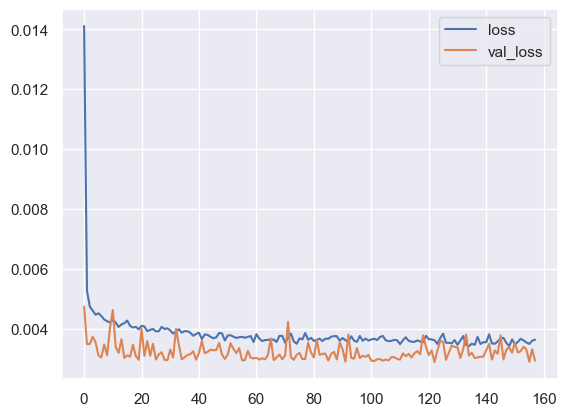

In [203]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [204]:
predictions = (model.predict(X_test) > 0.5)*1
print(classification_report(y_test,predictions))

2226/2226 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.81      0.80      0.80       113

    accuracy                           1.00     71202
   macro avg       0.91      0.90      0.90     71202
weighted avg       1.00      1.00      1.00     71202



In [205]:
print(confusion_matrix(y_test,predictions))
cm_df = pd.DataFrame(confusion_matrix(y_test,predictions))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

[[71068    21]
 [   23    90]]


,Predicted 0,Predicted 1
Actual 0,71068,21
Actual 1,23,90


In [206]:
CM = confusion_matrix(y_test,predictions)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

Este código está calculando los valores de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN) a partir de la matriz de confusión generada anteriormente.

In [207]:
f1 = f1_score(y_test, predictions)
# Sensibilidad, tasa de aciertos, recuperación o tasa de verdaderos positivos
TPR = TP/(TP+FN)
# Especificidad o tasa negativa verdadera
TNR = TN/(TN+FP) 
# Precisión o valor predictivo positivo
PPV = TP/(TP+FP)
# Valor predictivo negativo
NPV = TN/(TN+FN)
# Fall out o tasa de falsos positivos
FPR = FP/(FP+TN)
# Tasa de falsos negativos
FNR = FN/(TP+FN)
# Tasa de descubrimiento falso
FDR = FP/(TP+FP)
# Precisión general
ACC = (TP+TN)/(TP+FP+FN+TN)

In [208]:
print('Sensibilidad:',TPR)
print('Especificidad:',TNR)
print('Precisión:',PPV)
print('Valor predictivo negativo:',NPV)
print('Falsos positivos:',FPR)
print('Falsos negativos:',FNR)
print('Tasa de descubrimiento falso:',FDR)
print('F1 score:',f1)
print('Precisión general:',ACC)

Sensibilidad: 0.7964601769911505
Especificidad: 0.9997045956477092
Precisión: 0.8108108108108109
Valor predictivo negativo: 0.9996764710019552
Falsos positivos: 0.00029540435229079043
Falsos negativos: 0.20353982300884957
Tasa de descubrimiento falso: 0.1891891891891892
F1 score: 0.8035714285714286
Precisión general: 0.9993820398303418


# **Conclusiones**

- Sensibilidad: el modelo es capaz de detectar el 79.65% de los casos positivos. En otras palabras, cuando hay un fraude, el modelo identifica el 79.65% de los casos como tales.
- Especificidad: el modelo es muy preciso en la detección de transacciones legítimas, con una tasa del 99.97% de detección correcta.
- Precisión: el modelo tiene una precisión del 81.08%, lo que significa que de todas las transacciones que el modelo clasifica como fraude, el 81.08% son efectivamente fraudes.
- Valor predictivo negativo: el modelo tiene una alta tasa de detección correcta de transacciones legítimas, con un valor predictivo negativo del 99.97%.
- Falsos positivos: la tasa de falsos positivos del modelo es del 0.03%, lo que significa que solo el 0.03% de las transacciones legítimas son identificadas erróneamente como fraudes.
- Falsos negativos: la tasa de falsos negativos del modelo es del 20.35%, lo que significa que el 20.35% de las transacciones fraudulentas no son detectadas por el modelo.
- Tasa de descubrimiento falso: el modelo tiene una tasa del 18.92% de detección incorrecta de transacciones legítimas, lo que significa que el 18.92% de las transacciones legítimas son identificadas erróneamente como fraudes.
- F1 score: la puntuación F1 del modelo es del 80.36%, que es una medida general del rendimiento del modelo en términos de precisión y sensibilidad.
- Precisión general: la precisión general del modelo es del 99.94%, lo que significa que el modelo es muy preciso en general en la clasificación de las transacciones como legítimas o fraudulentas.

Credit Fraud Detection
https://www.kaggle.com/datasets/whenamancodes/fraud-detection